### Project 2
This is a machine learning project to build a model that will identify if customers are eligible for loan or not.

**Importing Libraries**

In [460]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


**Read My File**

In [461]:
df = pd.read_csv("C:/Users/STUTERN/Downloads/loan_data_set.csv")

In [462]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Clenaing

In [463]:
#checking the shape of the dataset
df.shape

(614, 13)

In [464]:
#checking the columns if there are properly labelled
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [465]:
#Remaing some columns that are not properly named
df = df.rename(columns={'ApplicantIncome': 'Applicant_Income', 
                        'CoapplicantIncome': 'Co_Applicant_Income', 
                        'LoanAmount': 'Loan_Amount'})

In [466]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Co_Applicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [467]:
#creating a function to check the value counts of the columns

for i in df.columns:
    i = df.value_counts(i)
    print(f'\n\n\nvalues of {i}')




values of Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Length: 614, dtype: int64



values of Gender
Male      489
Female    112
dtype: int64



values of Married
Yes    398
No     213
dtype: int64



values of Dependents
0     345
1     102
2     101
3+     51
dtype: int64



values of Education
Graduate        480
Not Graduate    134
dtype: int64



values of Self_Employed
No     500
Yes     82
dtype: int64



values of Applicant_Income
2500     9
4583     6
6000     6
2600     6
5000     5
        ..
3250     1
3246     1
3244     1
3237     1
81000    1
Length: 505, dtype: int64



values of Co_Applicant_Income
0.0        273
2083.0       5
2500.0       5
1666.0       5
1750.0       3
          ... 
1911.0       1
1915.0       1
1929.0       1
1964.0       1
41667.0      1
Length: 287, dtype: int64



values of Loan_Amount
120.0    20
110.0    17
100.0    15
160.0

In [468]:
#checking for missing values in the columns
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
Applicant_Income        0
Co_Applicant_Income     0
Loan_Amount            22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [469]:
#filling the missing values. Since all the columns with missing values are integer, I will fill them with their mode.
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [470]:
#df.isnull().sum()

In [471]:
#Checking for inconsistencies in the columns
(df == '?').any()

Loan_ID                False
Gender                 False
Married                False
Dependents             False
Education              False
Self_Employed          False
Applicant_Income       False
Co_Applicant_Income    False
Loan_Amount            False
Loan_Amount_Term       False
Credit_History         False
Property_Area          False
Loan_Status            False
dtype: bool

In [472]:
# checking if there are duplicate rows
df.duplicated().sum()

0

**Observations**

This loan dataset has 614 rows and 13 columns. 3 columns were not properly named so I renamed them. We have so many missing values in 7 columns. So I filled them with their modes. There were no inconsistency in the dataset. 
The target Variable is "Loan_Status" and it is a categorical column, so the model to use will be Supervised Classification Model

### EDA And Data Preprocessing 

In [473]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [474]:
#Make a copy of the dataset
df_copy =df.copy()

In [475]:
df.select_dtypes("number").columns

Index(['Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [476]:
df.select_dtypes("object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

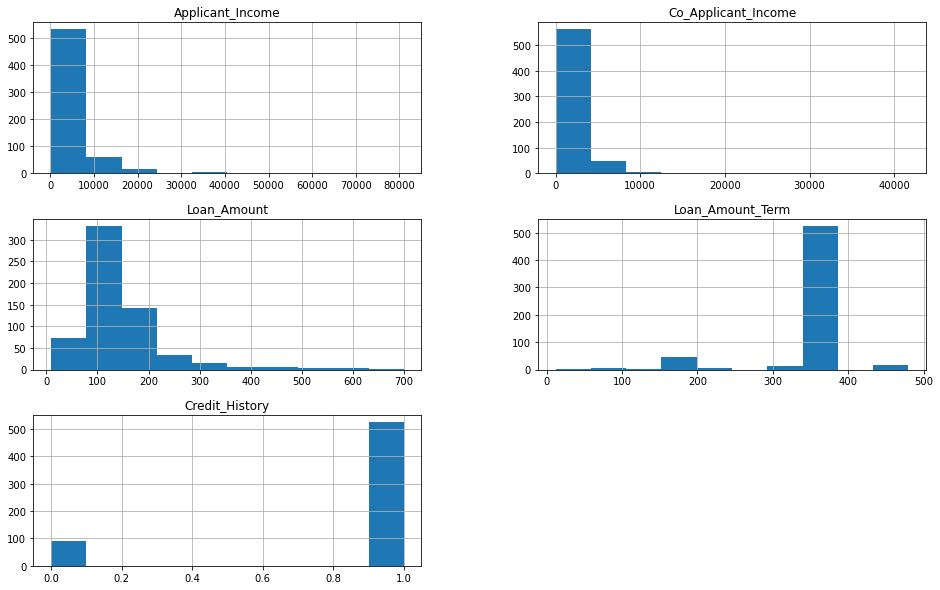

In [477]:
df.hist(figsize=[16,10]);

Transforming the Categorical Columns

In [478]:
to_numeric = {'Male': 1, 'Female': 2,
              'Yes': 1, 'No': 2, 
              '0' : 0, '1' : 1, '2' : 2, '3+': 3,
              'Graduate': 1, 'Not Graduate': 2,
              'Urban': 3, 'Semiurban': 2,'Rural': 1,
              'Y': 1, 'N': 0,
              }
#to_numeric

In [479]:
df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [480]:
df1 = df1.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [481]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])


In [482]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,610,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,611,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,612,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [483]:
df.corr()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.028029,0.016013,0.051559,0.039442,-0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,0.028029,1.000000,0.364569,-0.172914,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987
Married,0.016013,0.364569,1.000000,-0.334216,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478
Dependents,0.051559,-0.172914,-0.334216,1.000000,0.055752,-0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,-0.045364,-0.012304,0.055752,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.032874,-0.000525,0.004489,-0.056798,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700
Applicant_Income,0.016925,-0.058809,-0.051708,0.118202,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
Co_Applicant_Income,0.039211,-0.082912,-0.075948,0.030430,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
Loan_Amount,0.037369,-0.106404,-0.146212,0.163017,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,0.074030,0.100912,-0.103864,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


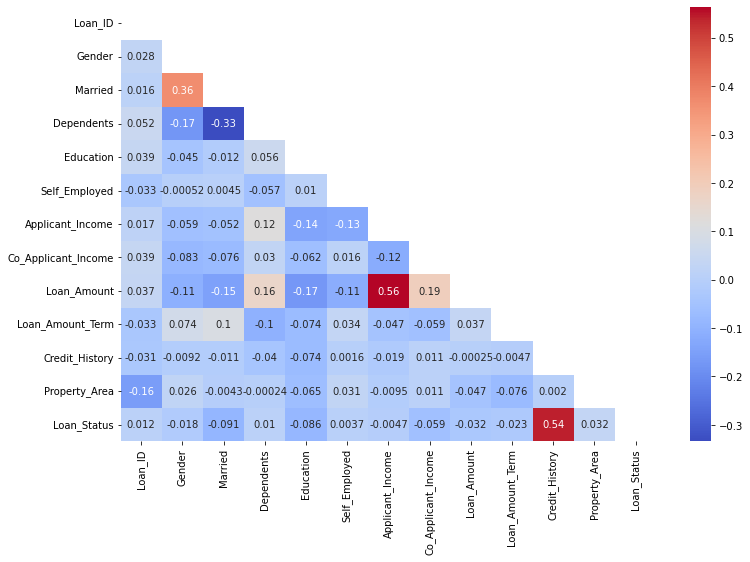

In [485]:
plt.figure(figsize=(12,8))
# using the upper triangle matrix as mask 
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), cmap ="coolwarm", annot=True, mask=matrix);

In [486]:
df.corr()["Loan_Status"].sort_values(ascending = False).index

Index(['Loan_Status', 'Credit_History', 'Property_Area', 'Loan_ID',
       'Dependents', 'Self_Employed', 'Applicant_Income', 'Gender',
       'Loan_Amount_Term', 'Loan_Amount', 'Co_Applicant_Income', 'Education',
       'Married'],
      dtype='object')

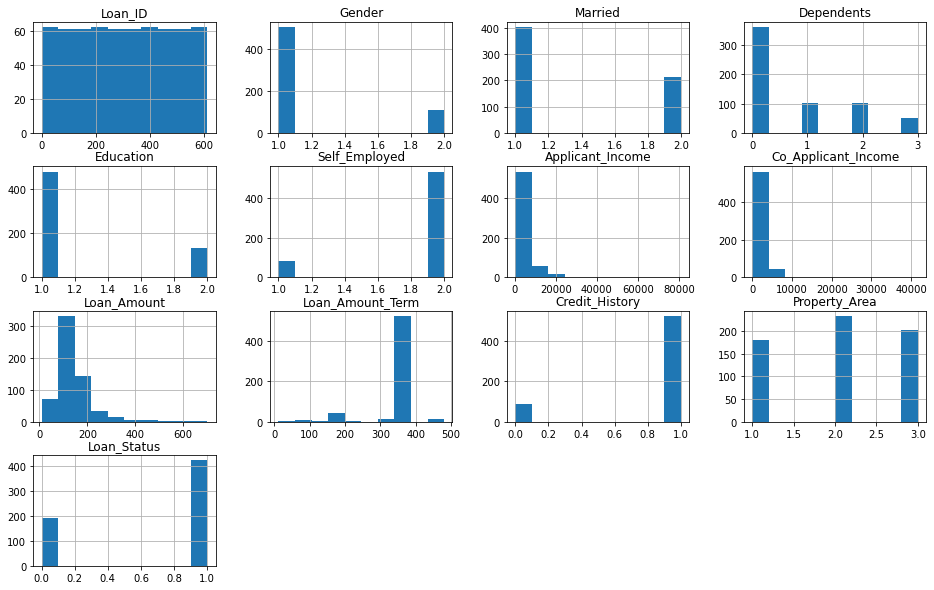

In [488]:
df.hist(figsize=[16,10]);

Checking the columns skewness 

In [490]:
df.skew(axis = 0, skipna = True)

Loan_ID                0.000000
Gender                 1.648795
Married                0.644850
Dependents             1.015551
Education              1.367622
Self_Employed         -2.159796
Applicant_Income       6.539513
Co_Applicant_Income    7.491531
Loan_Amount            2.745407
Loan_Amount_Term      -2.402112
Credit_History        -2.021971
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

The dataset has numerical and categorical columns, so I transformed the categorical columns manually to numerical so i can draw proper insight from the data and it's skewness. The columns don't really have strong correlations, only the Credit_History has a strong correlation with Loan_Status. The columns doesn't have high skewness so there's no point to treat skewness.

Dropping the target variable

In [491]:
raw_df = df["Loan_Status"]
df1 = df.copy()
df.drop("Loan_Status" , axis = 1 , inplace = True)

In [492]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline, make_pipeline

**Splitting Data Into Training And Testing**

In [493]:
x_train, y_train, x_test, y_test = train_test_split(df, raw_df, test_size = .3)

In [494]:
x_train.shape

(491, 12)

In [495]:
x_test.shape

(491,)

Using DecisionTreeClassifier

In [499]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(x_train, y_train)

Model_predict_train = DT_Model.predict(x_train)
Model_predict_test = DT_Model.predict(x_test)

accuracy_score_train = accuracy_score(Model_predict_train, y_train)
accuracy_score_test = accuracy_score(Model_predict_test, y_test)
       
print (f"The model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

ValueError: Number of labels=123 does not match number of samples=491

In [500]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_predict = RF.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

ValueError: Found input variables with inconsistent numbers of samples: [491, 123]

In [ ]:
RandomForestClassifier

In [ ]:
LogisticRegression